## Лабораторная работа №3

Задание: Выполнить низкочастотную фильтрацию в частотной области зашумленного изображения.

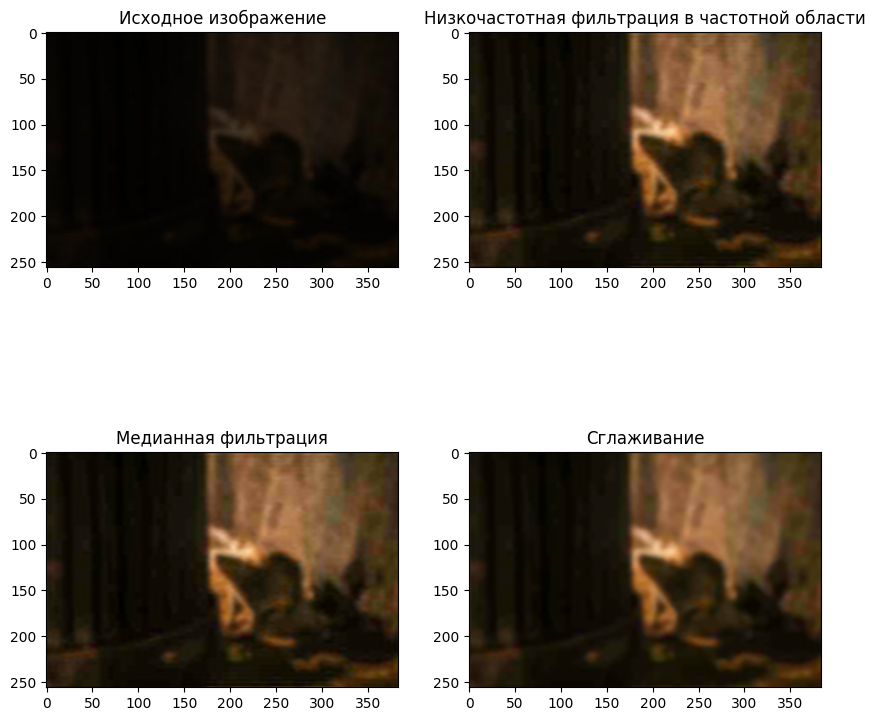

In [130]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


# Низкочастотная фильтрация в частотной области
def low_frequency_filter(img):
    channels = [0, 1, 2]
    img_channels = []

    for channel in channels:
        r = 50
        rows, cols = img[:,:,channel].shape
        crow, ccol = np.uint32((rows / 2, cols / 2))
        # create a mask first, center square is 1, remaining all zeros
        mask = np.zeros((rows, cols, 2), np.uint8)
        mask[crow - r:crow + r, ccol - r:ccol + r] = 1

        # вычисляем фурье-образ
        dft = cv.dft(np.float32(img[:,:,channel]), flags=cv.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)

        # применяем маску и делаем обратное преобразование Фурье
        dft_shift_masked = dft_shift * mask
        f_ishift = np.fft.ifftshift(dft_shift_masked)
        img_back = cv.idft(f_ishift)
        img_back = cv.magnitude(img_back[..., 0], img_back[..., 1])
        img_channels.append(img_back)

    result_img = cv.merge([img_channels[0], img_channels[1], img_channels[2]])
    result_img = result_img / np.max(result_img)

    return result_img

# Медианная фильтрация
def medium_filter(img):
    result_img = cv.medianBlur(img, 5)

    return result_img

# Cглаживание
def smooth(img):
    kernel55 = np.ones((3, 3), np.float32) / 9

    result_img = cv.filter2D(img, -1, kernel55)

    return result_img


image = cv.imread('img.jpg')
converted_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

result_img1 = low_frequency_filter(converted_image)
result_img2 = medium_filter(result_img1)
result_img3 = smooth(result_img2)

# вывод
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 10))
plt.subplot(gs[0]), plt.imshow(converted_image)
plt.title('Исходное изображение')
plt.subplot(gs[1]), plt.imshow(result_img1)
plt.title('Низкочастотная фильтрация в частотной области')
plt.subplot(gs[2]), plt.imshow(result_img1)
plt.title('Медианная фильтрация')
plt.subplot(gs[3]), plt.imshow(result_img3)
plt.title('Cглаживание')
plt.show()